In [ ]:
import cv2
import tensorflow as tf
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image

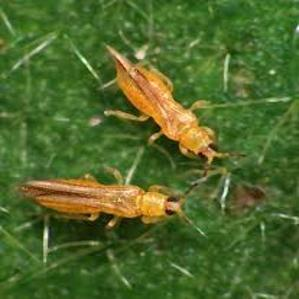

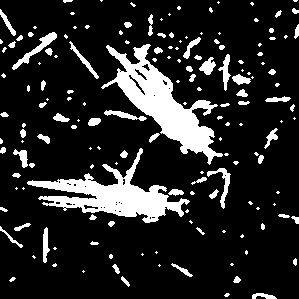

In [ ]:
#OTSU
# Read image
img = cv2.imread('TP (12).jpg')

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding method
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Apply morphological operations to clean up the thresholded image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Display the original image and the segmented image side by side
cv2_imshow(img)
cv2_imshow(clean)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=ee54f38fe5d02454aab99f5af235712b8b0ada0d910ea8917508d066f16452de
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [ ]:
#fuzzy k means
import numpy as np
import skfuzzy as fuzz
from PIL import Image

# Load the image as a numpy array
image = np.array(Image.open("TP (12).jpg"))

# Normalize the pixel values to range from 0 to 1
image = image / 255.0

# Reshape the image to a 2D array of pixels
pixels = image.reshape(-1, 1)

# Set the number of clusters
num_clusters = 5

# Set the fuzziness parameter
m = 2.0

# Set the maximum number of iterations
max_iter = 100

# Run the fuzzy k-means algorithm
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    pixels.T, num_clusters, m, error=0.005, maxiter=max_iter, init=None, seed=None)

# Get the index of the cluster with the highest membership value for each pixel
segmentation = np.argmax(u, axis=0)

# Reshape the segmentation back to the shape of the input image
segmentation = segmentation.reshape(image.shape)

# Save the segmented image
segmented_image = Image.fromarray((segmentation * 255).astype(np.uint8))
segmented_image.save("segmented_image.png")



ModuleNotFoundError: ignored

In [ ]:
#watershed Algorithm
import cv2
import numpy as np

# Read the input image
img = cv2.imread('input_image.jpg')

# Apply median blur to reduce noise
img = cv2.medianBlur(img, 5)

# Apply thresholding to segment the foreground object
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Apply opening-closing reconstruction
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=3)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=3)

# Perform distance transform
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 5)

# Apply thresholding to obtain foreground markers
_, fg_markers = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, cv2.THRESH_BINARY)

# Apply thresholding to obtain background markers
_, bg_markers = cv2.threshold(dist_transform, 0.3*dist_transform.max(), 255, cv2.THRESH_BINARY_INV)

# Combine the markers
markers = cv2.add(fg_markers, bg_markers)

# Convert markers to 8-bit integer
markers = np.uint8(markers)

# Perform watershed segmentation
markers = cv2.watershed(img, markers)

# Create a mask to segment the foreground object
mask = np.zeros_like(img)
mask[markers == 1] = 255

# Display the output image
cv2.imshow('Output Image', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()



error: ignored

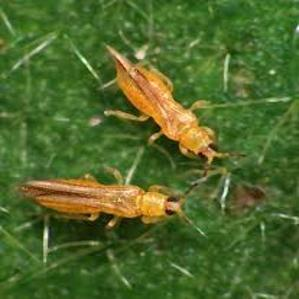

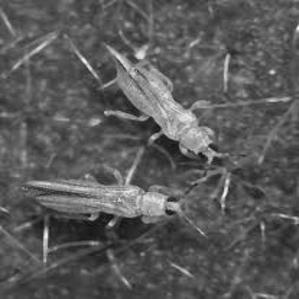

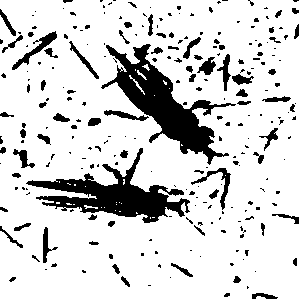

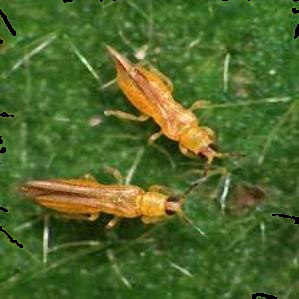

In [ ]:
#contour based
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Read input image
img = cv2.imread("TP (12).jpg")
cv2_imshow(img)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

# Apply binary thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cv2_imshow(thresh)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for each contour
masks = []
for cnt in contours:
    mask = np.zeros(gray.shape, dtype=np.uint8)
    cv2.drawContours(mask, [cnt], 0, 255, -1)
    masks.append(mask)

# Merge all masks into one
mask = np.zeros(gray.shape, dtype=np.uint8)
for m in masks:
    mask = cv2.bitwise_or(mask, m)

# Apply the mask to the original image
result = cv2.bitwise_and(img, img, mask=mask)

# Display the result
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()



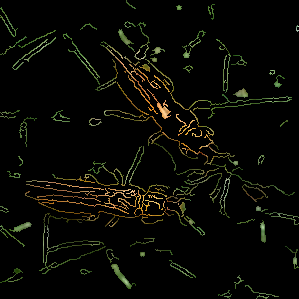

In [ ]:
#canny edge detection
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Read input image
img = cv2.imread("TP (12).jpg")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to smooth the image and reduce noise
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Apply Canny edge detection to extract edges
edges = cv2.Canny(blur, 50, 150)

# Find contours of the edges
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for each contour
masks = []
for cnt in contours:
    mask = np.zeros(gray.shape, dtype=np.uint8)
    cv2.drawContours(mask, [cnt], 0, 255, -1)
    masks.append(mask)

# Merge all masks into one
mask = np.zeros(gray.shape, dtype=np.uint8)
for m in masks:
    mask = cv2.bitwise_or(mask, m)

# Apply the mask to the original image
result = cv2.bitwise_and(img, img, mask=mask)

# Display the result
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()
